# Step 5: Comparing my own model's performance with sklearn's

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
current_dir = os.getcwd()

In [4]:
for dirpath, dirname, filenames in os.walk(current_dir):
    for filename in filenames:
        print(filename)

creating_dataframe.ipynb
data_analysis.ipynb
data_preprocessing.ipynb
decision_tree_and_random_forest_from_scratch.ipynb
sklearn_decision_tree_and_random_forest.ipynb
creating_dataframe-checkpoint.ipynb
data_analysis-checkpoint.ipynb
data_preprocessing-checkpoint.ipynb
decision_tree_and_random_forest_from_scratch-checkpoint.ipynb
sklearn_decision_tree_and_random_forest-checkpoint.ipynb


In [5]:
df = pd.read_csv('../dataset/failed_hdds_with_rul.csv')

In [6]:
df.shape

(18588, 31)

In [7]:
df.head()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,date_diff_days
0,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,9.0,100.0,0.0,...,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,26
1,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,2.0,100.0,24.0,...,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,26
2,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,2.0,100.0,0.0,...,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,52
3,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,5.0,100.0,0.0,...,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,83
4,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,4.0,100.0,3896.0,...,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,27


### Splitting data

In [8]:
X = df.drop(['date_diff_days'], axis=1).values

In [9]:
y = df['date_diff_days'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Another method for train-test split?
split_index = int(0.8 * len(X))
X_train_2, X_test_2 = X[:split_index], X[split_index:]
y_train_2, y_test_2 = y[:split_index], y[split_index:]

### Sklearn's decision tree regressor

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nsquared_error = 455.178\nsamples = 14870\nvalue = 29.58'),
 Text(0.25, 0.5, 'x[9] <= 369.0\nsquared_error = 444.977\nsamples = 14533\nvalue = 30.266'),
 Text(0.125, 0.16666666666666666, 'squared_error = 450.65\nsamples = 13212\nvalue = 31.425'),
 Text(0.375, 0.16666666666666666, 'squared_error = 240.299\nsamples = 1321\nvalue = 18.668'),
 Text(0.75, 0.5, 'x[21] <= 415.5\nsquared_error = 0.003\nsamples = 337\nvalue = 0.003'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.026\nsamples = 37\nvalue = 0.027'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 300\nvalue = 0.0')]

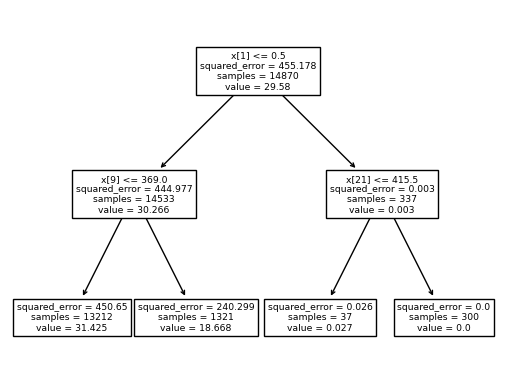

In [12]:
dtr = DecisionTreeRegressor(max_depth=2, min_samples_split=2)
dtr.fit(X_train, y_train)
plot_tree(dtr)

### Re-training and testing with a reasonable depth

In [13]:
dtr = DecisionTreeRegressor(max_depth=40, min_samples_split=2)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

### Measuring performance

In [23]:
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print(f'Decision tree MSE: {mse_dtr}')

rmse_dtr = root_mean_squared_error(y_test, y_pred_dtr)
print(f'Decision tree RMSE: {rmse_dtr}')

mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
print(f'Decision tree MAE: {mae_dtr}')

r2_score_dtr = r2_score(y_test, y_pred_dtr)
print(f'Decision tree R2 score: {r2_score_dtr}')

Decision tree MSE: 28.124058633674018
Decision tree RMSE: 5.303212105288079
Decision tree MAE: 2.1227810650887573
Decision tree R2 score: 0.9385937759388036


### Plotting actual vs predicted values

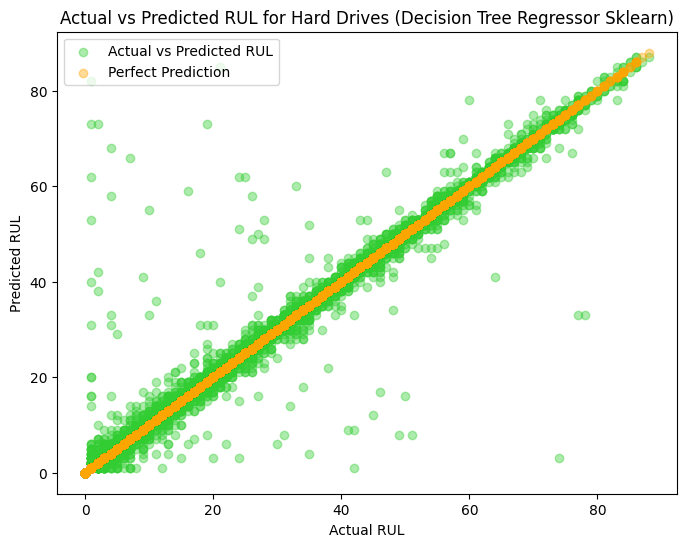

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dtr, alpha=0.4, label='Actual vs Predicted RUL', color='limegreen')
plt.scatter(y_test, y_test, alpha=0.4, label='Perfect Prediction', color='orange')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL for Hard Drives (Decision Tree Regressor Sklearn)')
plt.legend(loc='upper left')
plt.show()

In [16]:
print(f'Minimum value: {min(y_pred_dtr)}')
print(f'Mean: {np.mean(y_pred_dtr)}')
print(f'Median: {np.median(y_pred_dtr)}')
print(f'Standard Deviation: {np.std(y_pred_dtr)}')
print(f'Maxiumum value: {max(y_pred_dtr)}')

Minimum value: 0.0
Mean: 29.412183969876278
Median: 25.0
Standard Deviation: 21.390661582162043
Maxiumum value: 87.0


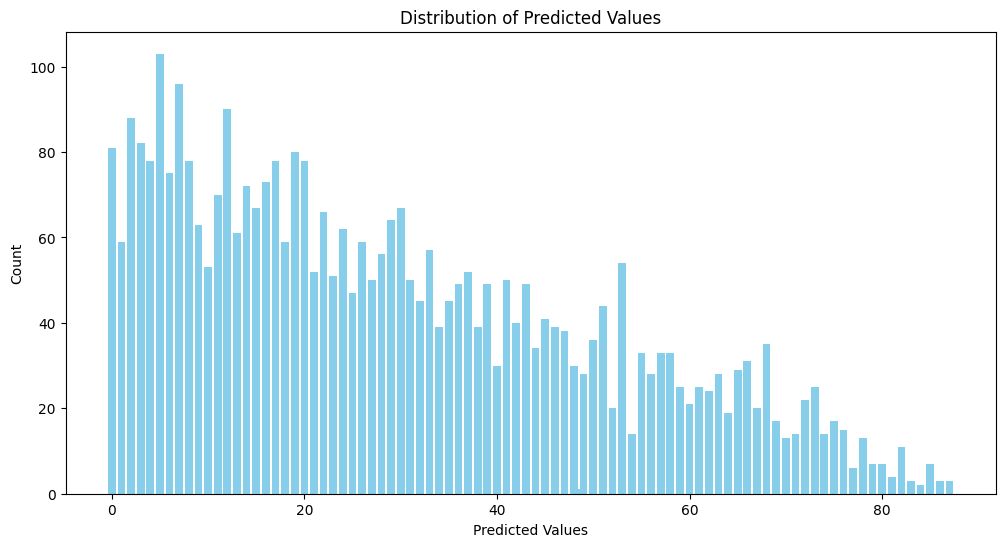

In [17]:
counter = Counter(y_pred_dtr)
sorted_counts = sorted(counter.items(), key=lambda x: x[0])  # Sort the items by value in ascending order
values = []
counts = []

for value, count in sorted_counts:
    values.append(value)
    counts.append(count)
    
plt.figure(figsize=(12, 6))
plt.bar(values, counts, color='skyblue')
plt.xlabel('Predicted Values')
plt.ylabel('Count')
plt.title('Distribution of Predicted Values')
plt.show()

In [45]:
def plot_histograms(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(6, 5))
    
    ax.hist([y_test, y_pred], color=['green', 'blue'], edgecolor='black', label=['Actual', 'Predicted'])
    ax.set_title('Comparison of Actual and Predicted Values')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.legend()

    plt.tight_layout()
    plt.show()

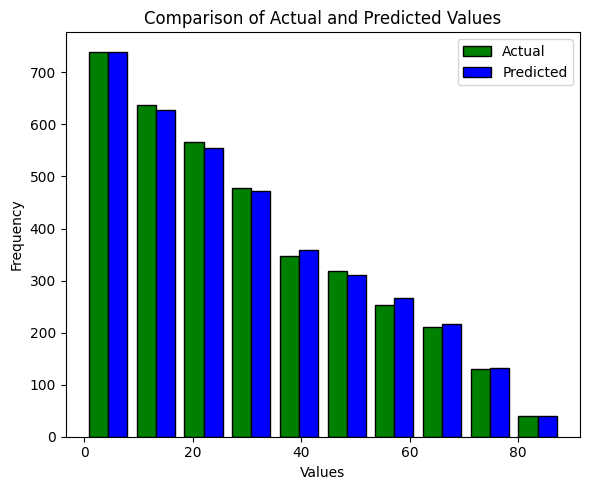

In [46]:
plot_histograms(y_test, y_pred_dtr)

### Sklearn's random forest regressor

In [21]:
rfr = RandomForestRegressor(n_estimators=20, max_depth=40, min_samples_split=2)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [27]:
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(f'Random forest MSE: {mse_rfr}')

rmse_rfr = root_mean_squared_error(y_test, y_pred_rfr)
print(f'Random forest RMSE: {rmse_rfr}')

mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
print(f'Random forest MAE: {mae_rfr}')

r2_score_rfr = r2_score(y_test, y_pred_rfr)
print(f'Random forest R2 score: {r2_score_rfr}')

Random forest MSE: 11.540404115115654
Random forest RMSE: 3.3971170299410725
Random forest MAE: 1.808055406132329
Random forest R2 score: 0.9748026182820907


### Plotting actual vs predicted values

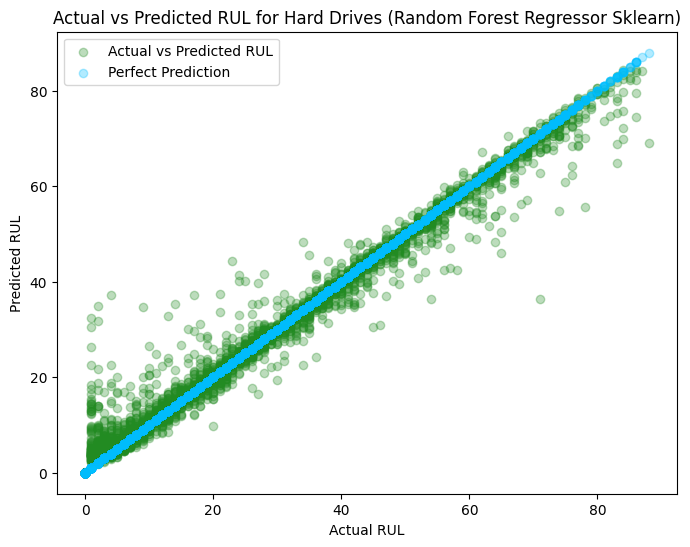

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rfr, alpha=0.3, label='Actual vs Predicted RUL', color='forestgreen')
plt.scatter(y_test, y_test, alpha=0.3, label='Perfect Prediction', color='deepskyblue')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL for Hard Drives (Random Forest Regressor Sklearn)')
plt.legend()
plt.show()

In [30]:
print(f'Minimum value: {min(y_pred_rfr)}')
print(f'Mean: {np.mean(y_pred_rfr)}')
print(f'Median: {np.median(y_pred_rfr)}')
print(f'Standard Deviation: {np.std(y_pred_rfr)}')
print(f'Maxiumum value: {max(y_pred_rfr)}')

Minimum value: 0.0
Mean: 29.339712210866058
Median: 25.45
Standard Deviation: 20.34232682418256
Maxiumum value: 84.45


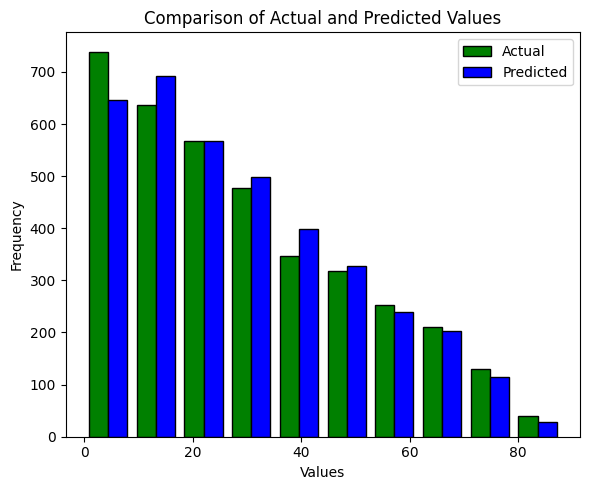

In [47]:
plot_histograms(y_test, y_pred_rfr)